# EPA1361 - Model-Based Decision Making

## Multi-model analysis

This exercise uses a simple version of the [Lotka-Volterra predator-prey equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) to show how the EMA Workbench can be used for a
multi-model analysis, in addition to typical parametric/structural uncertainties. This will let you test the connectors provided in the Workbench for Excel, NetLogo, and Vensim / PySD; we'll also use the models for the sensitivity analysis exercise in week 3.

**Assignment**
Using the three model files provided and the Python function below, define model objects for each implementation (Excel, NetLogo, Vensim/PySD, and Python), and test them using a single ensemble. Use 50 experiments sampled from the parameters below (so that each experiment will be executed for the 4 models, for a total of 200), and retrieve outputs for the _TIME_, _predators_, and _prey_ variables.
   * Excel and Vensim are only supported on Windows
   * Vensim requires the DSS version of Vensim
   * Netlogo supoprt depends on [jpype](http://jpype.readthedocs.io/en/latest/install.html) and [pynetlogo](https://pynetlogo.readthedocs.io/en/latest/). Also, if you don't have NetLogo installed, please get [NetLogo 6.3.0](https://ccl.northwestern.edu/netlogo/download.shtml)
   * for pysd, see [its documentation](http://pysd.readthedocs.io/en/master/installation.html)
   * If possible try to work with all model versions, but even 2 or 3 (pure python and something else should be sufficient).


|Parameter	|Range or value	        |
|-----------|--------------:|
|prey_birth_rate    	|0.015 – 0.035	|
|predation_rate|0.0005 – 0.003 	|
|predator_efficiency     	|0.001 – 0.004	    |
|predator_loss_rate	    |0.04 – 0.08	    |
|Final time	    |365	    |
|dt	    |0.25	    |

* Note that your EMA Workbench installation includes [example scripts](https://github.com/quaquel/EMAworkbench/tree/master/ema_workbench/examples) for the different connectors. The different model objects follow a similar syntax but will need to be slightly adjusted depending on the software (e.g. to specify the NetLogo run length or the sheet name in Excel).
  * This [tutorial](https://emaworkbench.readthedocs.io/en/latest/basic_tutorial.html) also shows a simple model in Python, Vensim and Excel connected to the workbench.

* These model objects can be used with a replication functionality (for instance to test the effect of stochastic uncertainty in a NetLogo model), which repeats a given experiment over multiple replications. You can use a single replication in this exercise as the models are not stochastic. By default, each outcome array will then have a shape of (# experiments, # replications, # time steps). Try adapting the outcome arrays so that they can be used with the _lines_ plotting function of the Workbench, and plot the results grouped by model.

* To check the graphical results, find the maximum absolute error of the time series you obtained for the _prey_ variable in the Excel, NetLogo, and Vensim/PySD models, relative to the Python function.

In [23]:
# Some imports you may need
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import SequentialEvaluator
from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging)

from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench.connectors.excel import ExcelModel
from ema_workbench.connectors.pysd_connector import PysdModel

from ema_workbench.em_framework.samplers import LHSSampler
from ema_workbench.em_framework.salib_samplers import MorrisSampler, SobolSampler

from ema_workbench.analysis.plotting import lines, Density

In [24]:
# Import the Python function
from model.pred_prey import PredPrey

#Instantiate model
model = Model('simplemodel', function=PredPrey)

#Define uncertainties and outcomes
model.uncertainties = [RealParameter("prey_birth_rate", 0.015, 0.035),
                       RealParameter("predation_rate", 0.00005, 0.003),
                       RealParameter("predator_efficiency", 0.001, 0.004)]

model.outcomes = [TimeSeriesOutcome("prey")]

with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=50)

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 285.77it/s]


In [25]:
experiments

,predation_rate,predator_efficiency,prey_birth_rate,scenario,policy,model
0,0.001923,0.002825,0.028970,200,None,simplemodel
1,0.002276,0.003956,0.030145,201,None,simplemodel
2,0.001642,0.001409,0.032955,202,None,simplemodel
3,0.002983,0.001729,0.029521,203,None,simplemodel
4,0.000590,0.002332,0.020768,204,None,simplemodel
5,0.002849,0.003187,0.018652,205,None,simplemodel
6,0.000313,0.001131,0.032483,206,None,simplemodel
7,0.002910,0.003812,0.015742,207,None,simplemodel
8,0.000741,0.003421,0.030522,208,None,simplemodel
9,0.001437,0.002465,0.029245,209,None,simplemodel


In [34]:
print(outcomes)

{'prey': array([[[50.        , 49.88133572, 49.75320834, ..., 23.17531693,
         22.75517963, 22.34186832]],

       [[50.        , 49.80784663, 49.59690585, ..., 30.77143192,
         30.99096156, 31.21186505]],

       [[50.        , 50.00140641, 50.00173853, ..., 36.31017317,
         36.34629654, 36.38303681]],

       ...,

       [[50.        , 50.34269922, 50.68570416, ..., 68.47590651,
         68.65439832, 68.81817972]],

       [[50.        , 49.80710588, 49.61315889, ..., 36.67242404,
         36.79925791, 36.92685518]],

       [[50.        , 49.87448898, 49.73565292, ..., 14.61298669,
         14.70172943, 14.7910147 ]]])}


AttributeError: 'NoneType' object has no attribute 'T'

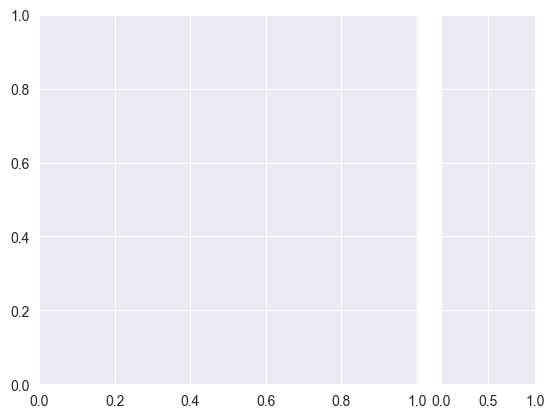

In [37]:
fig, axes = lines(experiments, outcomes, density=Density.VIOLIN, group_by="model")

plt.show()

In [3]:
# Define uncertainties and outcomes


# Define model objects for the different implementations
